In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Finding missing value
df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Survived', ylabel='count'>

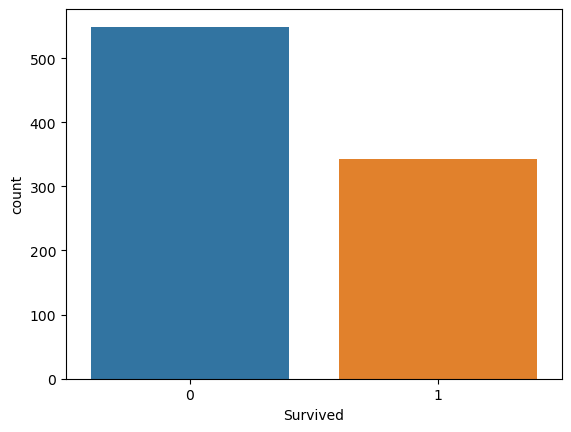

In [5]:
#visualizing no. of passangers who survived and  who do not survived
sns.countplot(x='Survived',data=df)

<Axes: >

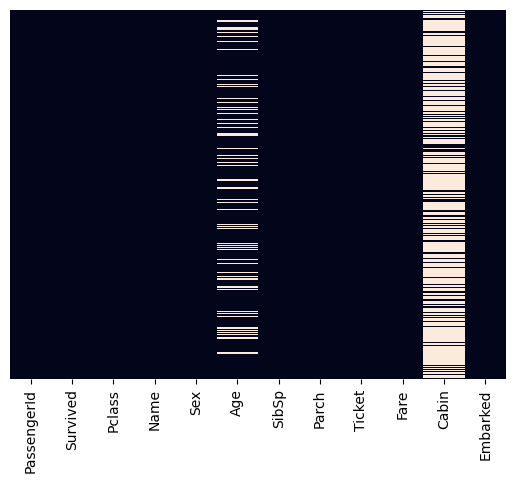

In [6]:
#using heatmap from seaborn library to see presence of null values in features
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

As we can see that data is missing in 'age' column which can be replaced with resonable replacement. It looks like too much data is missing from column 'Cabin'.

<Axes: xlabel='Survived', ylabel='count'>

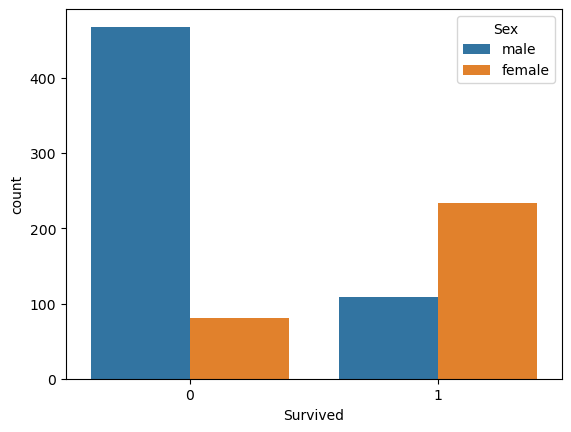

In [7]:
#checking total no. of male and female who survived and who do not
sns.countplot(x='Survived',hue='Sex',data=df)  #hue parameter divide on basis of sex

<Axes: xlabel='Survived', ylabel='count'>

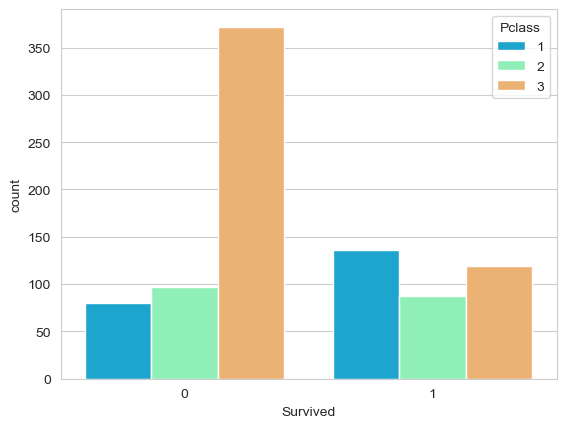

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

Passanger with class 3 survived more and passanger with class 1 died more.

<Axes: >

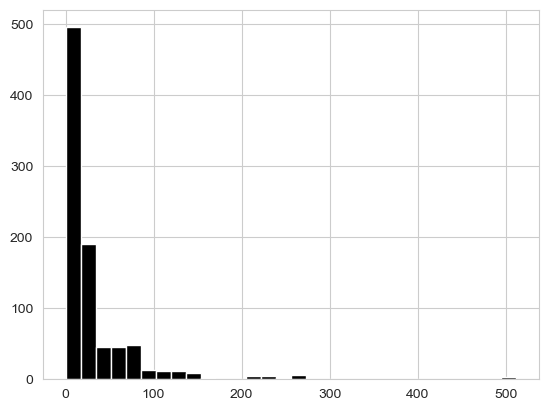

In [9]:
df['Fare'].hist(color='black',bins=30)

# DATA CLEANING
we have created function which will replace age of missing passanger with its average age in its respective class.

In [10]:
def replace_age(c):
    Age=c[0]
    Pclass=c[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age

In [11]:
#applying above function on column age of titanic dataset
df['Age']=df[['Age','Pclass']].apply(replace_age,axis=1)

<Axes: >

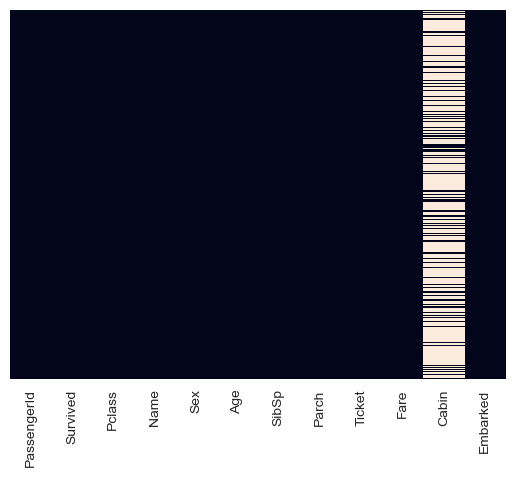

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

we can see that presence of null values from age column has gone.since cabin column has lots of null values and it is not of prime importance hence drop it.

In [13]:
df.drop('Cabin',axis=1,inplace=True) #using inplace=True drop the column permanently

In [14]:
#checking weather column is actually drop or not.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Pclass', ylabel='Age'>

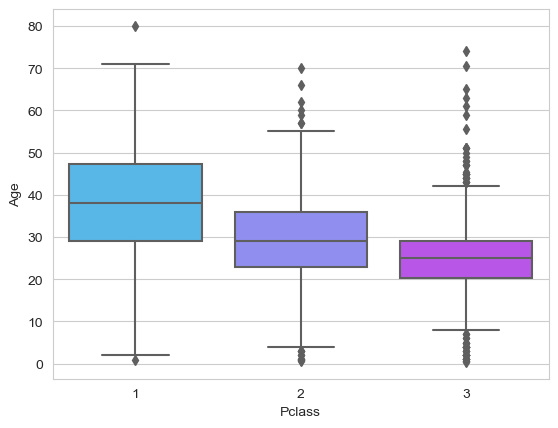

In [17]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='cool')

<Axes: xlabel='Survived', ylabel='Pclass'>

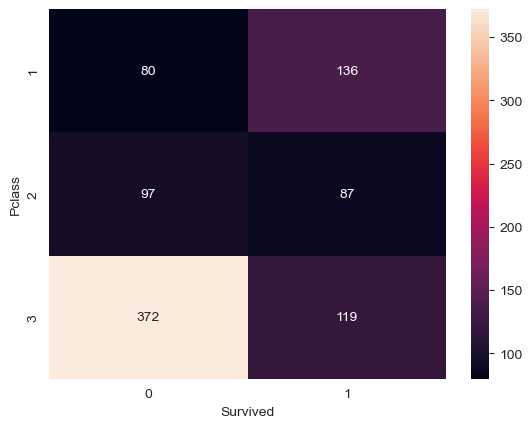

In [18]:
group=df.groupby(['Pclass','Survived'])
pclass_survived=group.size().unstack()
sns.heatmap(pclass_survived,annot=True,fmt='d')

Class 1 passenger has higher survival chance compared to class 1 and class 2.

<Axes: xlabel='Sex', ylabel='Age'>

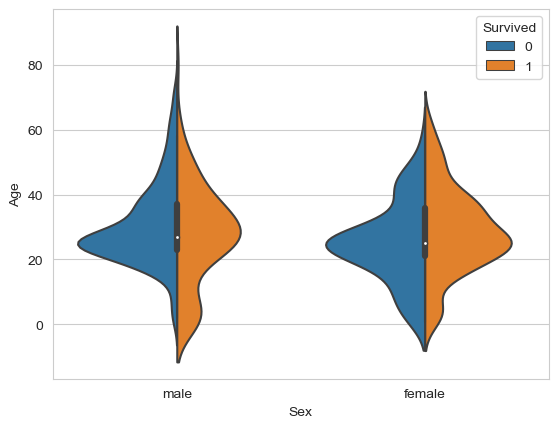

In [19]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = df, split = True)

In [20]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

<Axes: xlabel='Fare_Range', ylabel='Survived'>

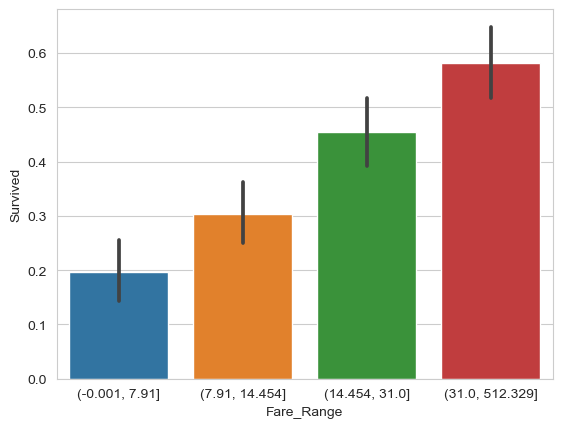

In [21]:
sns.barplot(x ='Fare_Range', y ='Survived', 
data = df)

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
predictors = df.drop(['Survived', 'PassengerId'], axis=1) 

In [26]:
target = df["Survived"] 

In [27]:
x_train, x_val, y_train, y_val = train_test_split( 
    predictors, target, test_size=0.3, random_state=100)

In [28]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

In [33]:
randomforest = RandomForestClassifier(random_state=40) 

In [35]:
randomforest.fit(x_train, y_train)

ValueError: could not convert string to float: 'Kink, Mr. Vincenz'